In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal
#params:
V = 63
EPS = 0.00001
n = 7 + V % 15
p = 0.2 + 0.005*V
N = 200
lamb = 1 + 0.02*V
n

10

In [3]:
def get_frequency_table(xs):
    df = pd.DataFrame({"values" :xs})
    df = pd.value_counts(df["values"]).to_frame().reset_index()
    df.columns = ['Value','Count']
    df = df.sort_values(by=['Value']) #Сортировка по значению
    df.reset_index(inplace = True, drop = True)
    return df

In [4]:
def count_edf(freqs):
    edm = [0]
    s = 0
    for i in freqs:
        s += i
        edm.append(round(s, 5))
    return edm

In [5]:
def count_emperical_mean(table):
    return sum(table.Frequency * table.Value)

In [6]:
def plot_edf(edf, values):
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    
    W = 0.005
    n = len(values)
    first = values[0] - 1
    plt.arrow(first,0,1,0,width=W,head_width = 0.02)
    for i in range(n - 1):
        plt.arrow(values[i], edf[i+1], values[i+1] - values[i], 0,width=W, head_width = 0.02)
    ax.set(
       xlim = [values[0] - 1, values[n - 1] + 1],
       ylim = [edf[0], edf[-1] + 0.1])
        



In [7]:
def count_emperical_dispersion(table):
    mean = count_emperical_mean(table)
    sqr = sum(table.Frequency * table.Value**2)
    return sqr - mean**2

In [8]:
def count_emperical_std(table):
    return np.sqrt(count_emperical_dispersion(table))

In [10]:
def count_moda(table):
    return True

EDF :  [0, 0.47, 0.735, 0.86, 0.91, 0.945, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0]

emperical_mean : 1.155

emperical_disp : 2.8409750000000007

emperical_std  : 1.6855192078407177



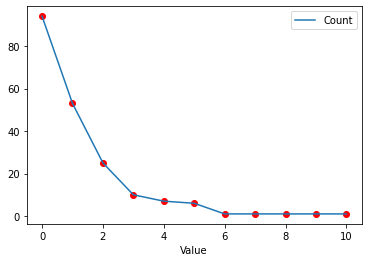

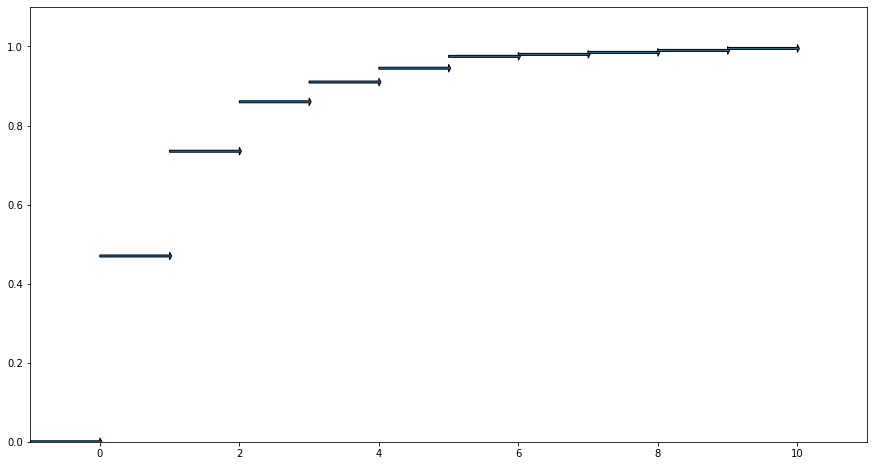

In [9]:
def main_count(xs):
    table = get_frequency_table(xs)
    table.plot(x='Value', y='Count',rot=0);
    plt.scatter(table.Value, table.Count, color="r");

    table['Frequency'] = table.Count / N
    edf = count_edf(table.Frequency) # Empirical distribution function
    
    emp_mean = count_emperical_mean(table)
    emp_disp = count_emperical_dispersion(table)
    emp_std  = count_emperical_std(table)
    
    print("EDF : ", edf, end='\n\n')
    print("emperical_mean :",emp_mean, end='\n\n' )
    print("emperical_disp :",emp_disp, end='\n\n' )
    print("emperical_std  :",emp_std, end='\n\n' )
    plot_edf(edf, table.Value)
    
    
    
    
main_count(np.random.geometric(p, N) - 1)    
#main_count(np.random.binomial(n, p, N))
#main_count(np.random.poisson(lamb, N))